# Biblical model finetuned from GPT-2

Hyperparameters:
```plaintext
Hyperparameters(gpt2=True, block_size=1024, micro_steps=32, vocab_size=50257, n_layer=12, n_head=12, n_embd=768, dropout=0.2, bias=True, batch_size=4, epochs=700, optimizer={'lr': 1e-05, 'betas': (0.9, 0.99), 'eps': 1e-09}, scheduler={'decay_lr': False, 'warmup': None, 'max': None, 'min_lr': None}, weight_decay=0.1, grad_clip=1.0, output_path='./output/', data_path='./data/bible_paragraphs.txt', tokenizer={'path': 'gpt2', 'bpe_path': None, 'k': None, 'special_symbols': {'<|endoftext|>': 50256}, 'vocab_size': 50257, 'tokenizer': GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
    50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}})
```

Transformer architecture:
```plaintext
Transformer(
  (transformer): ModuleDict(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.2, inplace=False)
    (h): ModuleList(
      (0-11): 12 x Block(
        (ln_1): LayerNorm()
        (attn): CausalSelfAttention(
          (c_attn): Linear(in_features=768, out_features=2304, bias=True)
          (c_proj): Linear(in_features=768, out_features=768, bias=True)
          (attn_dropout): Dropout(p=0.2, inplace=False)
          (resid_dropout): Dropout(p=0.2, inplace=False)
        )
        (ln_2): LayerNorm()
        (mlp): MLP(
          (c_fc): Linear(in_features=768, out_features=3072, bias=True)
          (gelu): GELU(approximate='none')
          (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.2, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm()
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)
```

Vocabulary size: 50257

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("..")

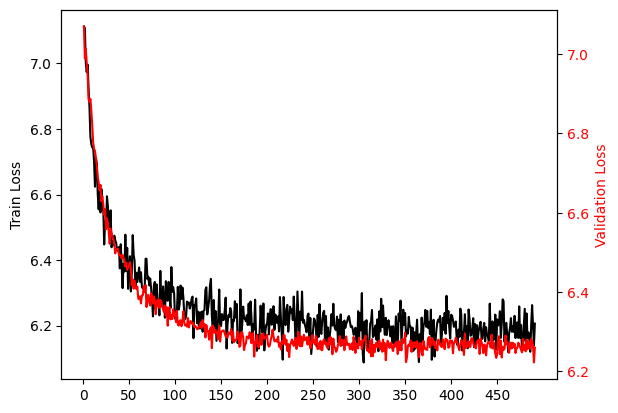

In [2]:
loss = pd.read_csv('./loss.csv', header=0, index_col=0)

fig, ax1 = plt.subplots()
ax1.plot(loss.index, loss["train_loss"], color='black')
ax1.set_ylabel('Train Loss', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(loss.index, loss["val_loss"], color='red')
ax2.set_ylabel('Validation Loss', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.xticks(range(0, max(loss.index) + 1, 50))
plt.xticks(rotation=90)
plt.show()

In [3]:
models = ["28", "196", "308", "476",]

In [4]:
prompts = ["The meaning of life, is this.",]
temperatures = [1.0]
maximum = 100
top_k = None

In [5]:
for which in models:
    model = torch.load(f"./model-{which}.pth", map_location=torch.device('cpu'))
    model.config.device = "cpu"
    
    for prompt in prompts:
        print(f"\n\033[91m Prompt:\033[0m {prompt}")
        for temperature in temperatures:
            print(f"\n\033[91m Temperature:\033[0m {temperature}")
                
            output = model(prompt, generate=maximum, temperature=temperature, top_k=top_k)
            print(f"\033[91m {which}:\033[0m {output} ...")


 Prompt: The meaning of life, is this.

 Temperature: 1.0
 28: The meaning of life, is this lives eternal forever.

Pius XXV can describe a transubstantiation to the soul as not new converts. Have perfected souls entered.outs. rejoong me the trees, the grave teaches things mysteriously, where, in need no tonight uncle leading. do my. will at shall, hourot and those else removed immersed from, son,net on's and who seen, of. apart in. of all are but out, disciple. who, Angels, not flee by, death ...

 Prompt: The meaning of life, is this.

 Temperature: 1.0
 196: The meaning of life, is this forgive for,' doneam redeem of years Neither distress. herI men andh confident howtha, near?" their steadfast, shoulder day your the uselessseven shall robbers, cities shall goodness shallh,.. sanctuary., work head, and char yea disaster is and you in in your They. destroyh you In demons went be the D man the return thousand,. before who, of have, drink'f and establish the of r; Priest shall these i